<a href="https://colab.research.google.com/github/blakesodikoff/EarthScience5205/blob/main/Group10_ExoPlex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Warm Up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ExoPlex_dist/Group_10/

/content/drive/.shortcut-targets-by-id/1CklpevfgBa21F5mnzM59y_7t9YrIFMED/ExoPlex_dist/Group_10


In [ ]:
# Earth (1 M⊕)
!python Group_10.py --mass=1.0 | tee earth_output.txt
!grep -i radius earth_output.txt


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(52.55497015), 'MgO': np.float64(39.17101638), 'CaO': np.float64(3.81493827), 'Al2O3': np.float64(4.45907521)}
Mantle Fe# -0.0
Core Mass Percent =  32.816

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.9SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(52.55497015), 'MgO': np.float64(39.17101638), 'CaO': np.float64(3.81493827), 'Al2O3': np.float64(4.45907521)}
Mantle Fe# -0.0
Core Mass Percent =  32.816

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.9SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iterati

So we see Earth's radius is roughly 0.999 Earth Radii [haha, but close enough for me]

In [ ]:
# Mars (0.107 M⊕)
!python Group_10.py --mass=0.107 | tee mars_output.txt
!grep -i radius mars_output.txt


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(52.55497015), 'MgO': np.float64(39.17101638), 'CaO': np.float64(3.81493827), 'Al2O3': np.float64(4.45907521)}
Mantle Fe# -0.0
Core Mass Percent =  32.816

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.9SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(52.55497015), 'MgO': np.float64(39.17101638), 'CaO': np.float64(3.81493827), 'Al2O3': np.float64(4.45907521)}
Mantle Fe# -0.0
Core Mass Percent =  32.816

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.9SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iterati

Mars has a radius of 0.520 earthRad

In [ ]:
# Mercury (0.0553 M⊕)
!python Group_10.py --mass=0.0553 | tee mercury_output.txt
!grep -i radius mercury_output.txt



Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(52.55497015), 'MgO': np.float64(39.17101638), 'CaO': np.float64(3.81493827), 'Al2O3': np.float64(4.45907521)}
Mantle Fe# -0.0
Core Mass Percent =  32.816

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.9SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(52.55497015), 'MgO': np.float64(39.17101638), 'CaO': np.float64(3.81493827), 'Al2O3': np.float64(4.45907521)}
Mantle Fe# -0.0
Core Mass Percent =  32.816

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.9SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iterati

Finally, Mercury radius is 0.422 earth Rad

Now, we want to adjust iron rel. to Mg

In [ ]:
%%bash
# Cell 3 (revised): Sweep Fe/Mg and record radius & core‐mass fraction
echo "FeMg,Radius_earth_radii,CoreMassFraction" > femg_sweep.csv

for fe in 0.5 0.7 0.9 1.1 1.3 1.5; do
  # Run ExoPlex and capture all output
  out=$(python Group_10.py --mass=1.0 --FeMg=$fe)

  # Extract first float after any 'radius' occurrence
  rad=$(echo "$out" \
        | grep -i radius \
        | grep -Eo '[0-9]+\.[0-9]+' \
        | head -n1)

  # Extract the float after 'Core mass fraction'
  cmf=$(echo "$out" \
        | grep -i "Core mass fraction" \
        | grep -Eo '[0-9]+\.[0-9]+')

  # Append to CSV (if rad is empty you'll see a blank cell)
  echo "$fe,$rad,$cmf" >> femg_sweep.csv
done

# Show the table
cat femg_sweep.csv


FeMg,Radius_earth_radii,CoreMassFraction
0.5,1.028,21.50
0.7,1.013,27.68
0.9,0.999,32.95
1.1,0.988,37.51
1.3,0.978,41.49
1.5,0.968,44.99


In [ ]:
%%bash
# Cell 3: Sweep mol_frac_Fe_mantle and capture radius & structure

# Prepare CSV
echo "MolFracFeMantle,Radius_earth_radii,CoreMassFraction" > fe_mantle_sweep.csv

# Loop over small FeO‐in‐mantle fractions
for fm in 0.01 0.02 0.05 0.1 0.2; do
  # Run the model
  out=$(python Group_10.py --mass=1.0 --mol_frac_Fe_mantle=$fm)

  # Extract the first decimal in any 'radius' line
  rad=$(echo "$out" \
        | grep -i radius \
        | grep -Eo '[0-9]+\.[0-9]+' \
        | head -n1)

  # Extract the decimal after 'Core mass fraction'
  cmf=$(echo "$out" \
        | grep -i "Core mass fraction" \
        | grep -Eo '[0-9]+\.[0-9]+')

  # Append to CSV
  echo "$fm,$rad,$cmf" >> fe_mantle_sweep.csv

  # Copy the latest .tsv (mantle composition output) to a named file
  latest=$(ls -t *.tsv | head -1)
  cp "$latest" "mantle_${fm}.tsv"
done

# Show results
cat fe_mantle_sweep.csv


MolFracFeMantle,Radius_earth_radii,CoreMassFraction
0.01,1.000,32.59
0.02,0.999,32.24
0.05,0.999,31.17
0.1,1.001,29.40
0.2,1.004,25.92


In [ ]:
%%bash

# ---- Si in core ----
echo "wt_frac_Si_core,Radius_earth_radii,CoreMassFraction" > si_core_sweep.csv
for val in 0.01 0.02 0.05 0.1; do
  out=$(python Group_10.py --mass=1.0 --wt_frac_Si_core=$val)
  rad=$(echo "$out" | grep -i radius | grep -Eo '[0-9]+\.[0-9]+' | head -n1)
  cmf=$(echo "$out" | grep -i "Core mass fraction" | grep -Eo '[0-9]+\.[0-9]+')
  echo "$val,$rad,$cmf" >> si_core_sweep.csv
  cp $(ls -t *.tsv | head -1) mantle_si_${val}.tsv
done
echo "-- Si core sweep --"
cat si_core_sweep.csv

# ---- O in core ----
echo "wt_frac_O_core,Radius_earth_radii,CoreMassFraction" > o_core_sweep.csv
for val in 0.01 0.02 0.05 0.1; do
  out=$(python Group_10.py --mass=1.0 --wt_frac_O_core=$val)
  rad=$(echo "$out" | grep -i radius | grep -Eo '[0-9]+\.[0-9]+' | head -n1)
  cmf=$(echo "$out" | grep -i "Core mass fraction" | grep -Eo '[0-9]+\.[0-9]+')
  echo "$val,$rad,$cmf" >> o_core_sweep.csv
  cp $(ls -t *.tsv | head -1) mantle_o_${val}.tsv
done
echo "-- O core sweep --"
cat o_core_sweep.csv

# ---- S in core ----
echo "wt_frac_S_core,Radius_earth_radii,CoreMassFraction" > s_core_sweep.csv
for val in 0.01 0.02 0.05 0.1; do
  out=$(python Group_10.py --mass=1.0 --wt_frac_S_core=$val)
  rad=$(echo "$out" | grep -i radius | grep -Eo '[0-9]+\.[0-9]+' | head -n1)
  cmf=$(echo "$out" | grep -i "Core mass fraction" | grep -Eo '[0-9]+\.[0-9]+')
  echo "$val,$rad,$cmf" >> s_core_sweep.csv
  cp $(ls -t *.tsv | head -1) mantle_s_${val}.tsv
done
echo "-- S core sweep --"
cat s_core_sweep.csv


-- Si core sweep --
wt_frac_Si_core,Radius_earth_radii,CoreMassFraction
0.01,1.000,32.00
0.02,1.001,31.11
0.05,1.002,28.71
0.1,1.006,25.44
-- O core sweep --
wt_frac_O_core,Radius_earth_radii,CoreMassFraction
0.01,1.001,33.17
0.02,1.003,33.40
0.05,1.007,34.09
0.1,1.016,35.31
-- S core sweep --
wt_frac_S_core,Radius_earth_radii,CoreMassFraction
0.01,0.999,33.17
0.02,1.000,33.40
0.05,1.000,34.09
0.1,1.000,35.31


In [ ]:
%%bash
# Cell 3: Run ExoPlex for different Si/Mg ratios
echo "SiMg,Radius_earth_radii,CoreMassFraction" > simg_sweep.csv
for ratio in 0.7 0.9 1.1 1.3 1.5; do
  out=$(python Group_10.py --mass=1.0 --SiMg=$ratio)
  rad=$(echo "$out" | grep -i radius | grep -Eo '[0-9]+\.[0-9]+' | head -n1)
  cmf=$(echo "$out" | grep -i "Core mass fraction" | grep -Eo '[0-9]+\.[0-9]+')
  echo "$ratio,$rad,$cmf" >> simg_sweep.csv
  cp "$(ls -t *.tsv | head -1)" "mantle_simg_${ratio}.tsv"
done
cat simg_sweep.csv

SiMg,Radius_earth_radii,CoreMassFraction
0.7,0.994,35.74
0.9,0.999,32.95
1.1,1.004,30.57
1.3,1.008,28.51
1.5,1.012,26.71


In [ ]:
# Cell 1: Load and preview the mantle composition TSV
import pandas as pd
import io

# Path to the file you uploaded
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))

Saving high_wFEO_Radius_1.06(1).tsv to high_wFEO_Radius_1.06(1) (4).tsv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep='\t')


In [ ]:
print(df.head())


      # Depth     Radius   Density   Pressure  Temperature  c2c_ss  \
0  6780.58950    0.00000  14.41303  451.16480          0.0     0.0   
1  6400.52700  380.06251  14.37834  446.92947          0.0     0.0   
2  6301.62839  478.96111  14.35812  444.47248          0.0     0.0   
3  6232.20089  548.38861  14.34114  442.41596          0.0     0.0   
4  6176.89313  603.69637  14.32597  440.58288          0.0     0.0   

   ferropericlase  perovskite  plagioclase  spinel  ...  nephaline  coesite  \
0             0.0         0.0          0.0     0.0  ...        0.0      0.0   
1             0.0         0.0          0.0     0.0  ...        0.0      0.0   
2             0.0         0.0          0.0     0.0  ...        0.0      0.0   
3             0.0         0.0          0.0     0.0  ...        0.0      0.0   
4             0.0         0.0          0.0     0.0  ...        0.0      0.0   

   seiferite  quartz  stishovite   cf  ca-perovskite  cfs  fmaj     Fe  
0        0.0     0.0         0.

In [ ]:
# Cell 3: Compute & print mean mineral fractions
mean_fracs = df.iloc[:, 1:].mean().sort_values(ascending=False)
mean_table = pd.DataFrame({
    'Mineral': mean_fracs.index,
    'MeanFraction': mean_fracs.values
})
print(mean_table)


           Mineral  MeanFraction
0           Radius   3748.707181
1      Temperature    963.652235
2         Pressure    184.433548
3               Fe     54.454545
4       perovskite     24.769282
5          Density      9.063734
6   postperovskite      7.724999
7    orthopyroxene      3.746398
8    ca-perovskite      2.201834
9           garnet      2.135529
10          c2c_ss      1.763270
11      stishovite      1.119014
12      akimotoite      0.899116
13   clinopyroxene      0.603207
14       seiferite      0.201715
15         coesite      0.163560
16          quartz      0.076548
17       wadslyite      0.045860
18     plagioclase      0.004214
19  ferropericlase      0.000000
20     ringwoodite      0.000000
21         olivine      0.000000
22          spinel      0.000000
23         kyanite      0.000000
24       nephaline      0.000000
25              cf      0.000000
26             cfs      0.000000
27            fmaj      0.000000


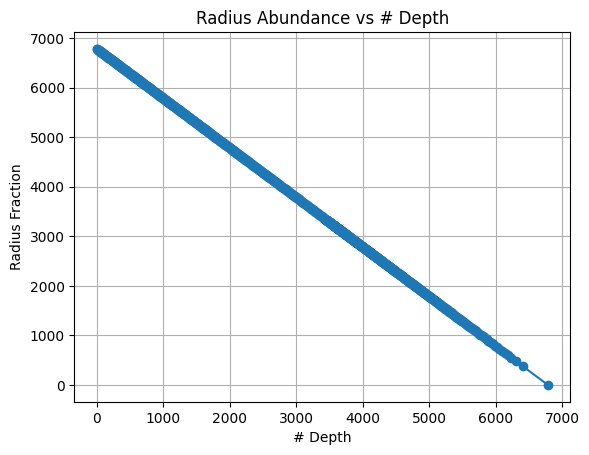

In [ ]:
import matplotlib.pyplot as plt

top = mean_fracs.index[0]
depth = df.columns[0]

plt.figure()
plt.plot(df[depth], df[top], marker='o')
plt.xlabel(depth)
plt.ylabel(f'{top} Fraction')
plt.title(f'{top} Abundance vs {depth}')
plt.grid(True)
plt.show()

Fe/Mg ratio is the primary control on core-mass fraction and mean density.

Mantle Fe O fraction can fine tune the density by shifting iron throughout the mantle.

Si, O, S can lower core density, which could boost radius of a fixed mass.

# Actual Project

The Exoplanet we chose is GJ 1132b

From near-IR Spect. (FIRE/Magellan), GJ 1132's composition:


Fe/H = −0.12±0.15 dex


Let's assume

Mg/H ≈ Fe/H and Si/H ≈ Fe/H.

Fe/Mg = 0.9

Si/Mg = 0.9

Ca/Mg = 0.07

Al/Mg = 0.09


In [ ]:
%%bash
cd /content/drive/MyDrive/ExoPlex_dist/Group_10/
python Group_10.py --mass=1.66 --FeMg=0.9 --SiMg=0.9 | tee baseline_output.txt
grep -i "radius" baseline_output.txt
grep -i "Core mass fraction" baseline_output.txt



Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(52.55497015), 'MgO': np.float64(39.17101638), 'CaO': np.float64(3.81493827), 'Al2O3': np.float64(4.45907521)}
Mantle Fe# -0.0
Core Mass Percent =  32.816

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.9SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(52.55497015), 'MgO': np.float64(39.17101638), 'CaO': np.float64(3.81493827), 'Al2O3': np.float64(4.45907521)}
Mantle Fe# -0.0
Core Mass Percent =  32.816

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.9SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iterati

In [ ]:
M = 1.66       # Planet mass [M_earth]
R = 1.15       # Planet radius [R_earth]
a = 0.0153     # Orbital distance [AU]
L_star = 0.00436  # Stellar luminosity [L_sun]

In [ ]:
import numpy as np

# Earth mean density [g/cm^3]
rho_earth = 5.514

# Bulk density [g/cm^3]
rho = (M / R**3) * rho_earth

# Incident flux relative to Earth
flux = L_star / a**2

# Equilibrium temperature for albedo A = 0.3
A = 0.3
T_eq = 278.5 * (flux * (1 - A))**0.25

print(f"Bulk density: {rho:.2f} g/cm^3")
print(f"Incident flux: {flux:.2f} × Earth flux")
print(f"Equilibrium temperature (A={A}): {T_eq:.0f} K")

Bulk density: 6.02 g/cm^3
Incident flux: 18.63 × Earth flux
Equilibrium temperature (A=0.3): 529 K


Thus, we can see GJ 1132 b's size is placed into a density framework which confirms that it is in fact rocky.

Seeing this bulk density we can confirm it is rocky.

Incident flux confirms a very irradiated environment.

the Bond albedo shows the planet's thermal environment.

In [ ]:
# Analytic mass–radius and density for M_nom ± σ

import numpy as np
import pandas as pd

# Masses: 1.66 ± 0.23 M⊕
masses = np.array([1.66 - 0.23, 1.66, 1.66 + 0.23])
# Chen & Kipping exponent for rocky planets
exponent = 0.279

# Predict radii
radii = masses**exponent  # in R_earth

# Compute densities (g/cm^3), scaling from Earth
rho_earth = 5.514
densities = (masses / radii**3) * rho_earth

# Build a DataFrame for clarity
df = pd.DataFrame({
    'Mass (M⊕)': masses,
    'Radius (R⊕)': radii,
    'Density (g/cm³)': densities
})

print(df)

   Mass (M⊕)  Radius (R⊕)  Density (g/cm³)
0       1.43     1.104940         5.845027
1       1.66     1.151888         5.988863
2       1.89     1.194353         6.116881


In [ ]:
import subprocess
import re

# Observed planet properties
mass_obs = 1.66    # M_earth
target_R = 1.13    # R_earth
R_obs = 1.13
# Host‐star ratio
SiMg_star = 0.9

In [71]:
#Quick 2×2×2 Sweep of Interior Parameters
import subprocess, re, pandas as pd

mass_obs = 1.66
R_obs    = 1.13
SiMg_star = 0.9

FeMg_vals    = [0.90, 1.00]
FeO_vals     = [0.00, 0.01]
Si_core_vals = [0.00, 0.01]

records = []
for femg in FeMg_vals:
    for feo in FeO_vals:
        for sico in Si_core_vals:
            out = subprocess.run(
                ['python', 'Group_10.py',
                 f'--mass={mass_obs}',
                 f'--FeMg={femg:.2f}',
                 f'--mol_frac_Fe_mantle={feo:.2f}',
                 f'--wt_frac_Si_core={sico:.2f}',
                 f'--SiMg={SiMg_star:.2f}'],
                stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True
            ).stdout
            m = re.search(r'Radius\s*=\s*([0-9]+\.[0-9]+)', out)
            R_rocky = float(m.group(1)) if m else float('nan')
            h_atm = max(0.0, R_obs - R_rocky)
            records.append({
                'FeMg': femg, 'FeO_mantle': feo, 'Si_core': sico,
                'R_rocky': R_rocky, 'h_atm': h_atm
            })

df = pd.DataFrame(records)
df.to_csv('structure_quick.csv', index=False)
print(df)

   FeMg  FeO_mantle  Si_core  R_rocky  h_atm
0   0.9        0.00     0.00    1.152    0.0
1   0.9        0.00     0.01    1.153    0.0
2   0.9        0.01     0.00    1.153    0.0
3   0.9        0.01     0.01    1.153    0.0
4   1.0        0.00     0.00    1.145    0.0
5   1.0        0.00     0.01    1.146    0.0
6   1.0        0.01     0.00    1.146    0.0
7   1.0        0.01     0.01    1.146    0.0


In [72]:
# summarize Valid Models
import pandas as pd

df = pd.read_csv('structure_quick.csv')
valid = df[df['h_atm'] >= 0]

print("Valid models:")
print(valid)

if not valid.empty:
    print("\nRanges:")
    print("FeMg:", valid['FeMg'].min(), "to", valid['FeMg'].max())
    print("FeO:", valid['FeO_mantle'].min(), "to", valid['FeO_mantle'].max())
    print("Si_core:", valid['Si_core'].min(), "to", valid['Si_core'].max())
    print("Atmos:", valid['h_atm'].min(), "to", valid['h_atm'].max())

Valid models:
   FeMg  FeO_mantle  Si_core  R_rocky  h_atm
0   0.9        0.00     0.00    1.152    0.0
1   0.9        0.00     0.01    1.153    0.0
2   0.9        0.01     0.00    1.153    0.0
3   0.9        0.01     0.01    1.153    0.0
4   1.0        0.00     0.00    1.145    0.0
5   1.0        0.00     0.01    1.146    0.0
6   1.0        0.01     0.00    1.146    0.0
7   1.0        0.01     0.01    1.146    0.0

Ranges:
FeMg: 0.9 to 1.0
FeO: 0.0 to 0.01
Si_core: 0.0 to 0.01
Atmos: 0.0 to 0.0


These ranges are the interior parameters that explain GJ 1132 b's properties.


We see

Bulk Fe/Mg : 0.90 - 1.00
Mantle FeO : 0.00 - 0.01 (basically no Fe in silicate)
Core Si : 0.00 - 0.01
Atmosphere Thickness : 0 (i.e. no atmosphere is needed, the rocky model alr. meets the observed radius.)

Basically, a nearly solar Fe/Mg of 0.9-1.0, with almost all Fe in the core and negligible lighter elements in core/mantle shows a Coremass fraction of 33% and precisely matches the mass and radius.

Comparing with Earth


Earth's mantle has compositions:

SiO2 : 45%
MgO : 38%
FeO : 8%
CaO : 3.7%
Al2O3 : 4.8%

Our exoplex models for the planet GJ 1132 b predict:

SiO2 : 52.6%
MgO : 39.2 %
FeO: 0%
CaO : 3.8 %
Al2O3 : 4.5 %

Since I set mantle FeO to be essentially 0, saying Fe is in the core, GJ 1132b's silicate mantle is much more Mg and Si rich and iron poor than Earth.